# Section 1: Business Understanding

### * With calendar and listings data from airbnb we want to know which month has highest and lowest occupancy in Seattle?
### * Which month has lowest and highest prices for the listings?
### * What are the different factors/features influencing the listings price?
### * Which area in Seattle is have the highest and lowest occupancy?

In [33]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline


df_calendar = pd.read_csv("airbnb_data/calendar.csv")
df_listings = pd.read_csv("airbnb_data/listings.csv")
df_reviews = pd.read_csv("airbnb_data/reviews.csv")

In [34]:
pd.options.mode.chained_assignment = None

# Section 2: Data Understanding

### Listings and Calendar have one to may relationship
### Listings and Reviews also have one to many relationship
### Listings dataframe has 91 columns, and we need to extract only those which influence price - id, host_response_time, host_response_rate, accommodates, bathrooms, bedrooms, beds, price, weekly_price, monthly_price, cleaning_fee, extra_people, minimum_nights, review_scores_rating, and instant_bookable
### All price columns datatype needs to be change to numeric - Calendar and Listings
### For our business questions we may not even require Reviews dataframe

In [3]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [5]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [188]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [35]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [190]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


# Section 3: Prepare Data

### Cleanup calendar and listings data (details below)

In [36]:
# Cleanup the calendar data
"""
1. First convert the price to numeric (float) and Fill nulls with 0 as those listing are left blank. 
We could also use mean which will give very different results as we inflate the price of the listings which 
were vacant during the calendar days. We definitely do not want to drop the na records as it would not give
right answer for occupancy rate.
2. Convert date column from object to date
3. Convert listing_id to string so that it is not interfere as metric column
4. Add new columns for Year, Month and Year-Month for easy grouping of price
"""

replace_decimal = (lambda x:x[:-3].replace(',', '.') if type(x) is str else x)
replace_dollar = (lambda x:x.replace('$', '') if type(x) is str else x)

df_calendar['price'] = df_calendar.price.apply(replace_decimal)
df_calendar['price'] = df_calendar.price.apply(replace_dollar)
df_calendar['price'] = df_calendar['price'].astype(float)
df_calendar['price'].fillna(0, inplace=True)

df_calendar['date'] = pd.to_datetime(df_calendar['date'])
df_calendar['listing_id'] = df_calendar.listing_id.astype(str)
df_calendar['month'] = pd.DatetimeIndex(df_calendar['date']).month
df_calendar['year'] = pd.DatetimeIndex(df_calendar['date']).year
df_calendar['month_year'] = pd.to_datetime(df_calendar['date']).dt.to_period('M')

df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  object        
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  object        
 3   price       1393570 non-null  float64       
 4   month       1393570 non-null  int64         
 5   year        1393570 non-null  int64         
 6   month_year  1393570 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(2), object(2), period[M](1)
memory usage: 74.4+ MB


In [37]:
df_calendar.head()

,listing_id,date,available,price,month,year,month_year
0,241032,2016-01-04,t,85.0,1,2016,2016-01
1,241032,2016-01-05,t,85.0,1,2016,2016-01
2,241032,2016-01-06,f,0.0,1,2016,2016-01
3,241032,2016-01-07,f,0.0,1,2016,2016-01
4,241032,2016-01-08,f,0.0,1,2016,2016-01


In [73]:
# Cleanup Listing Dataframe
"""
1. We only need columns from listing dataframe which have influence on price prediction, so extract 
following columns from listing df into new df - id, host_response_time, host_response_rate, accommodates,
bathrooms, bedrooms, beds, price, weekly_price, monthly_price, cleaning_fee, extra_people,
minimum_nights, review_scores_rating, instant_bookable
2. Convert id (which is listing_id) to str
3. Convert all price columns to float, i.e., remove $ sign and any extra ,
4. Impute columns bathrooms, beds, bedrooms with mode value 
5. Convert percentage to float - host_response_rate and review_scores_rating
"""

df_listings_sub = df_listings[['id', 'host_response_time', 'host_response_rate', 'accommodates', 'bathrooms', 
                               'bedrooms', 'beds', 'price', 'weekly_price', 'monthly_price', 'cleaning_fee',
                              'extra_people', 'minimum_nights', 'review_scores_rating', 'instant_bookable', 'zipcode']]


In [74]:
df_listings_sub['id'] = df_listings['id'].astype(str)

In [75]:
"""
Lambda function to fill nan value mode value of aparticular column
Impute values for beds, bathrooms and bedrooms 
"""
fill_mode = lambda col:col.fillna(col.mode()[0])
df_listings_sub[['beds', 'bathrooms', 'bedrooms']] = df_listings_sub[['beds', 'bathrooms', 'bedrooms']].apply(fill_mode, axis=0)


In [86]:
"""
Fill all nan price related records with 0 value as listings were empty
"""
df_listings_sub['weekly_price'] = df_listings_sub.weekly_price.apply(replace_decimal)
df_listings_sub['weekly_price'] = df_listings_sub.weekly_price.apply(replace_dollar)
df_listings_sub['weekly_price'] = df_listings_sub['weekly_price'].astype(float)
df_listings_sub['weekly_price'].fillna(0, inplace=True)

df_listings_sub['monthly_price'] = df_listings_sub.monthly_price.apply(replace_decimal)
df_listings_sub['monthly_price'] = df_listings_sub.monthly_price.apply(replace_dollar)
df_listings_sub['monthly_price'] = df_listings_sub['monthly_price'].astype(float)
df_listings_sub['monthly_price'].fillna(0, inplace=True)

df_listings_sub['price'] = df_listings_sub.price.apply(replace_decimal)
df_listings_sub['price'] = df_listings_sub.price.apply(replace_dollar)
df_listings_sub['price'] = df_listings_sub['price'].astype(float)

df_listings_sub['cleaning_fee'] = df_listings_sub.cleaning_fee.apply(replace_decimal)
df_listings_sub['cleaning_fee'] = df_listings_sub.cleaning_fee.apply(replace_dollar)
df_listings_sub['cleaning_fee'] = df_listings_sub['cleaning_fee'].astype(float)
df_listings_sub['cleaning_fee'].fillna(0, inplace=True)

df_listings_sub['extra_people'] = df_listings_sub.extra_people.apply(replace_decimal)
df_listings_sub['extra_people'] = df_listings_sub.extra_people.apply(replace_dollar)
df_listings_sub['extra_people'] = df_listings_sub['extra_people'].astype(float)


In [77]:
"""
Lambda function which receive a value checks if it's a string, replaces any % characters and convert it to Float
else return the same value
Input: x 
Output: Float(x)/100 if String else x
"""
replace_percent = (lambda x:(float(x.replace('%', ''))/100.0) if type(x) is str else x)
df_listings_sub['host_response_rate'] = df_listings_sub.host_response_rate.apply(replace_percent)


In [78]:
"""
Lambda function which receive a float value and return a value between 0 and 1 (non-percentage)
Input: x 
Output: x/100
"""
replace_review_per = (lambda x:(x)/100.0)
df_listings_sub['review_scores_rating'] = df_listings_sub['review_scores_rating'].apply(replace_review_per)

In [69]:
df_listings_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3818 non-null   object 
 1   host_response_time    3295 non-null   object 
 2   host_response_rate    3295 non-null   float64
 3   accommodates          3818 non-null   int64  
 4   bathrooms             3818 non-null   float64
 5   bedrooms              3818 non-null   float64
 6   beds                  3818 non-null   float64
 7   price                 3818 non-null   float64
 8   weekly_price          2009 non-null   float64
 9   monthly_price         1517 non-null   float64
 10  cleaning_fee          2788 non-null   float64
 11  extra_people          3818 non-null   float64
 12  minimum_nights        3818 non-null   int64  
 13  review_scores_rating  3171 non-null   float64
 14  instant_bookable      3818 non-null   object 
 15  zipcode              

In [87]:
df_listings_sub.head()

,id,host_response_time,host_response_rate,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,cleaning_fee,extra_people,minimum_nights,review_scores_rating,instant_bookable,zipcode
0,241032,within a few hours,0.96,4,1.0,1.0,1.0,85.0,0.0,0.0,0.0,5.0,1,0.95,f,98119
1,953595,within an hour,0.98,4,1.0,1.0,1.0,150.0,1.0,3.0,40.0,0.0,2,0.96,f,98119
2,3308979,within a few hours,0.67,11,4.5,5.0,7.0,975.0,0.0,0.0,300.0,25.0,4,0.97,f,98119
3,7421966,NaN,NaN,3,1.0,0.0,2.0,100.0,650.0,2.3,0.0,0.0,1,NaN,f,98119
4,278830,within an hour,1.00,6,2.0,3.0,3.0,450.0,0.0,0.0,125.0,15.0,1,0.92,f,98119


# Section 4 & 5: Model Data and Results

## 1. 2016 Occupancy rate through out the year 

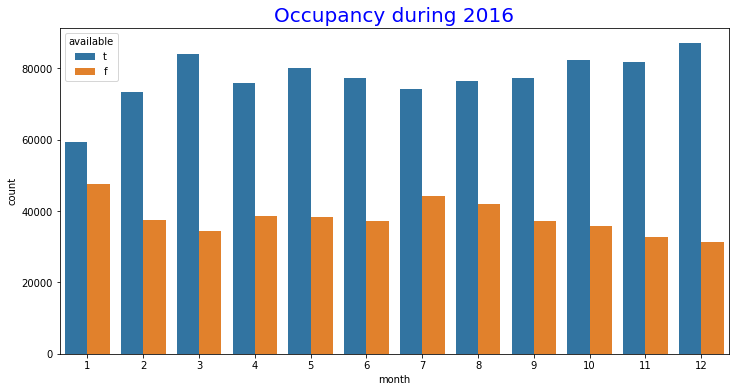

In [88]:
"""
Analyze the 2016 Occupancy month over month
""" 
plt.rcParams['figure.figsize'] = (12,6)

font = {'color':  'blue',
        'weight': 'normal',
        'size': 20,
        }
base_color = sns.color_palette()[0]


df_calendar_2016 = df_calendar[df_calendar.year == 2016]
month = df_calendar_2016.month
sns.countplot(data = df_calendar, x = month, hue = 'available');
# set title for plot
plt.title('Occupancy during 2016', fontdict=font);

### Occupancy is lowest during December, and highest during January

## 2. Average Price Per Month for year 2016

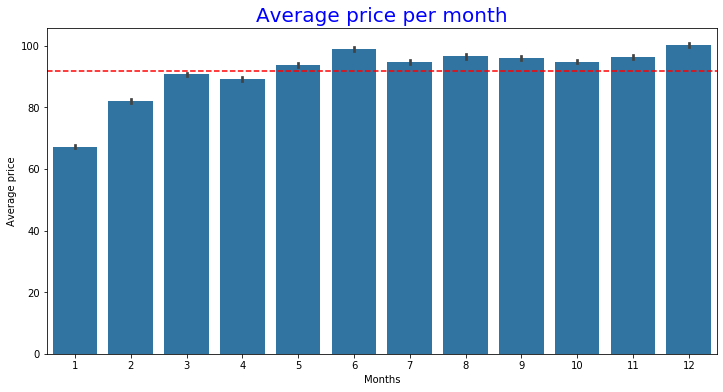

In [89]:
"""
Analyze the price over period of time
"""
sns.barplot(data = df_calendar_2016, x = month, y = 'price',color=base_color)
plt.ylabel('Average price')
plt.xlabel('Months')
plt.title('Average price per month', fontdict=font);
plt.axhline(df_calendar_2016.price.mean(), linestyle='--', color='red');

### Price is consistently high between June and December. December prices are at peak, and January is at lowest

## 3. Corelation of different features with price

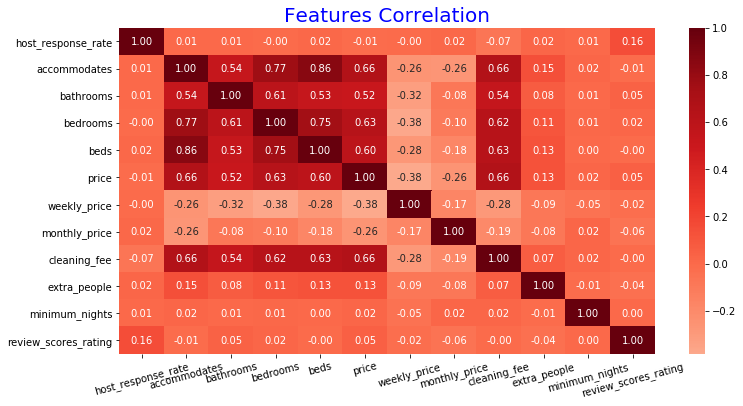

In [15]:
"""
Find the correlation of different features with price
"""
listing_corr = df_listings_sub.corr()

kot = listing_corr[listing_corr.apply(lambda x: abs(x)>=0)]

sns.heatmap(kot, annot = True, fmt = '.2f', cmap = 'Reds', center = 0)
plt.title('Features Correlation', fontdict=font);
plt.xticks(rotation = 15);

### Strong Corelation with Price: accommodates, bathrooms, bedrooms, beds, and monthly_price

## 4. Response time for the hosts

In [95]:
def plot_historgram(df, column_name, base_color, plot_title):
    """Plot the historgram with passed parameters
    Input:
        df = dataframe
        column_name = name of the column which goes as X-axis
        base_color = Color of the histogram plot 
        plot_title = Title to given for the plot
    """
    cat_order = df[column_name].value_counts().index
    sns.countplot(data= df, x= column_name, color= base_color, order= cat_order)
    plt.title(plot_title, fontdict= font)


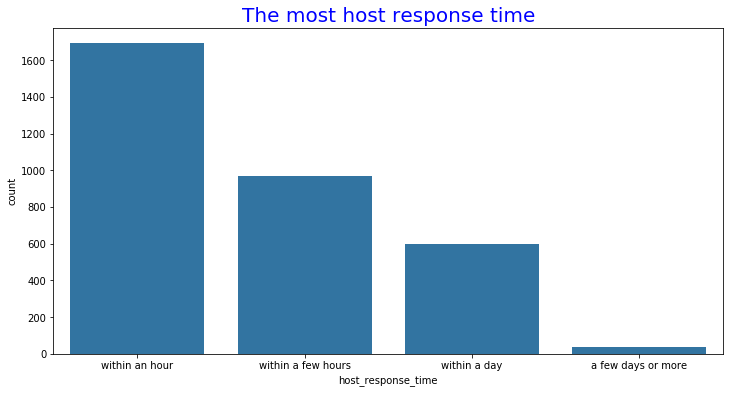

In [96]:
"""
Analyze the host response time w.r.t. all the listings
"""
plot_historgram(df= df_listings_sub, 
                column_name= 'host_response_time', 
                base_color= base_color, 
                plot_title= 'The most host response time')


### Most hosts respond with an hour of the request

## 5. Occupancy per Zip Code - Areas most in demand, to least demand

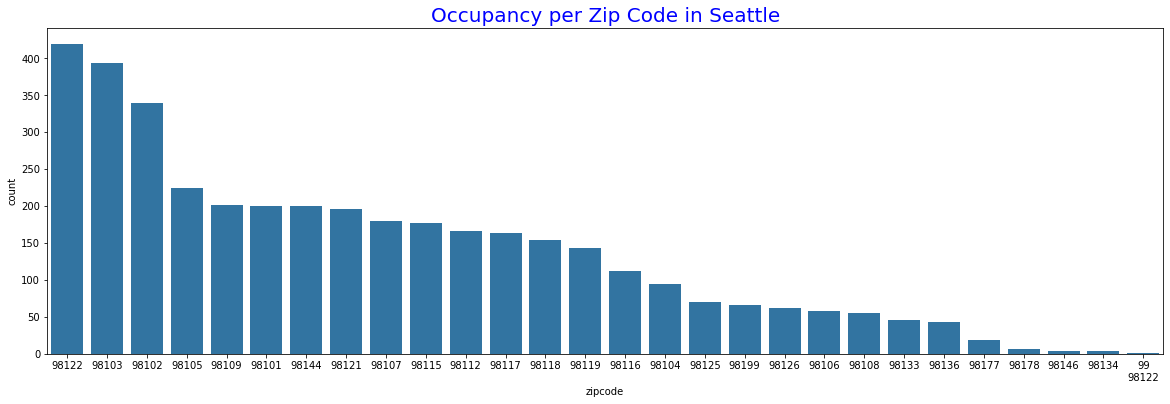

In [97]:
"""
Area within Seattle with highest and lowest occupancy
"""
plt.rcParams['figure.figsize'] = (20,6)

plot_historgram(df= df_listings_sub, 
                column_name= 'zipcode', 
                base_color= base_color, 
                plot_title= 'Occupancy per Zip Code in Seattle')


# Price Prediction - Based on accommodates, bathrooms, beds and bedrooms

In [19]:
# Form the X (independent features) and y (dependent variable) dataframes
X = df_listings_sub[['accommodates', 'bathrooms', 'beds', 'bedrooms']]
y = df_listings_sub['price']

In [20]:
# Split train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# Create model/Fit and Predict
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict and score the model - test set
y_train_preds = lm_model.predict(X_train)

print("The r-squared score for the model using only quantitative variables was {} on {} values."
      .format(r2_score(y_train, y_train_preds), len(y_train)))
        
#Predict and score the model - test set
y_test_preds = lm_model.predict(X_test) 
print("The r-squared score for the model using only quantitative variables was {} on {} values."
      .format(r2_score(y_test, y_test_preds), len(y_test)))

The r-squared score for the model using only quantitative variables was 0.488987349102768 on 2672 values.
The r-squared score for the model using only quantitative variables was 0.4973346831399944 on 1146 values.


Rank features by their impact on the price: 
         feature       coef   abs_coef
1     bathrooms  29.519086  29.519086
3      bedrooms  19.707436  19.707436
0  accommodates  19.351816  19.351816
2          beds  -1.747924   1.747924 



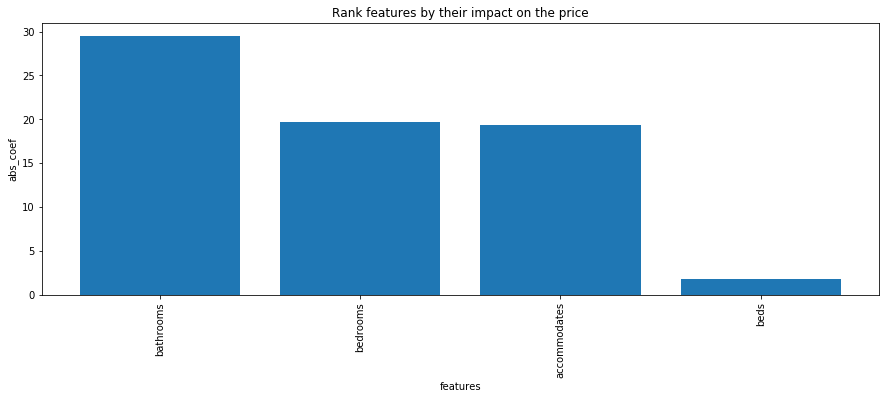

In [22]:
coef_df = pd.DataFrame()
coef_df['feature'] = X_train.columns
coef_df['coef'] = lm_model.coef_
coef_df['abs_coef'] = np.abs(lm_model.coef_)
coef_df = coef_df.sort_values(by=['abs_coef'], ascending=False)
print('Rank features by their impact on the price: \n', coef_df, '\n')

plt.figure(figsize = (15,5))
plt.bar(coef_df['feature'], coef_df['abs_coef'])
plt.xlabel('features')
plt.xticks(coef_df['feature'], rotation = 90)
plt.ylabel('abs_coef')
plt.title('Rank features by their impact on the price')
plt.show()

### With minimal differences in r-squared scores on Training and Test data shows that model is not an overfit.

In [99]:
!!jupyter nbconvert *.ipynb

['[NbConvertApp] Converting notebook AirBnB_Project3.ipynb to html',
 '[NbConvertApp] Writing 541396 bytes to AirBnB_Project3.html',
 '[NbConvertApp] Converting notebook NLS.ipynb to html',
 '[NbConvertApp] Writing 349340 bytes to NLS.html',
 '[NbConvertApp] Converting notebook Pandas_Parctise.ipynb to html',
 '[NbConvertApp] Writing 359737 bytes to Pandas_Parctise.html',
 '[NbConvertApp] Converting notebook PySpark-Sheet-1.ipynb to html',
 '[NbConvertApp] Writing 282265 bytes to PySpark-Sheet-1.html',
 '[NbConvertApp] Converting notebook Python_Practice.ipynb to html',
 '[NbConvertApp] Writing 286051 bytes to Python_Practice.html',
 '[NbConvertApp] Converting notebook Storing_data.ipynb to html',
 '[NbConvertApp] Writing 333669 bytes to Storing_data.html',
 '[NbConvertApp] Converting notebook data-wrangling-template.ipynb to html',
 '[NbConvertApp] Writing 977946 bytes to data-wrangling-template.html',
 '[NbConvertApp] Converting notebook finding_donors.ipynb to html',
 '[NbConvertApp